In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
import seaborn as sns

 Load dataset

In [288]:
df = pd.read_csv("nepal_exam_scores.csv")
exam_scores = df["Exam_Score"]

 Basic statistics

In [289]:

mu = np.mean(exam_scores)
sigma = np.std(exam_scores)
print("mean:", mu)
print("standard deviation:", sigma)

mean: 59.5924
standard deviation: 9.286962702627807


Plot Histogram + Normal PDF

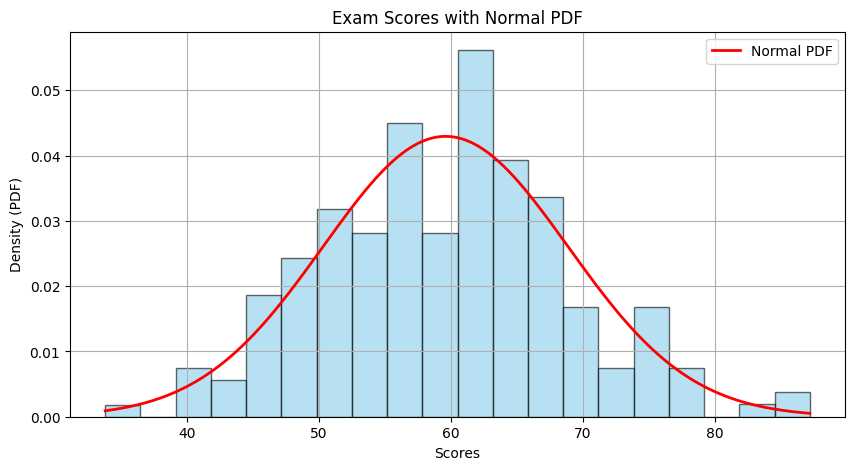

In [290]:
plt.figure(figsize=(10,5))
count, bins, ignored = plt.hist(exam_scores, bins=20, density=True, alpha=0.6, color='skyblue', edgecolor='black')
x = np.linspace(min(exam_scores), max(exam_scores), 1000)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', linewidth=2, label="Normal PDF")
plt.grid()
plt.title("Exam Scores with Normal PDF")
plt.xlabel("Scores")
plt.ylabel("Density (PDF)")
plt.legend()
plt.show()

Compare likelihood of scoring 55 vs 70

In [291]:
pdf_55 = norm.pdf(55, mu, sigma)
pdf_70 = norm.pdf(70, mu, sigma)
print(f"PDF at 55 (likelihood near 55): {pdf_55:.4f}")
print(f"PDF at 70 (likelihood near 70): {pdf_70:.4f}")

PDF at 55 (likelihood near 55): 0.0380
PDF at 70 (likelihood near 70): 0.0229


CDF Curve

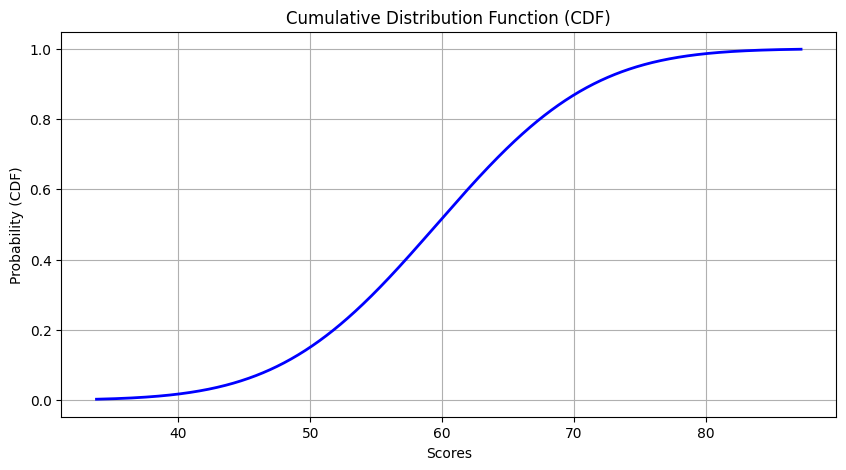

In [292]:
cdf = norm.cdf(x, mu, sigma)
plt.figure(figsize=(10,5))
plt.plot(x, cdf, 'b-', linewidth=2)
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Scores")
plt.ylabel("Probability (CDF)")
plt.grid()
plt.show()

Probability calculations

In [293]:
prob_70 = norm.cdf(70, mu, sigma)      # P(X ≤ 70)
prob_50_70 = norm.cdf(70, mu, sigma) - norm.cdf(50, mu, sigma)  # P(50 ≤ X ≤ 70)
prob_above_80 = 1 - norm.cdf(80, mu, sigma)  # P(X ≥ 80)

print(f"📌 Probability of scoring <= 70: {prob_70:.2f}")
print(f"📌 Probability of scoring between 50 and 70: {prob_50_70:.2f}")
print(f"📌 Probability of scoring >= 80: {prob_above_80:.2f}")


📌 Probability of scoring <= 70: 0.87
📌 Probability of scoring between 50 and 70: 0.72
📌 Probability of scoring >= 80: 0.01


Shade area: P(X ≤ 70)

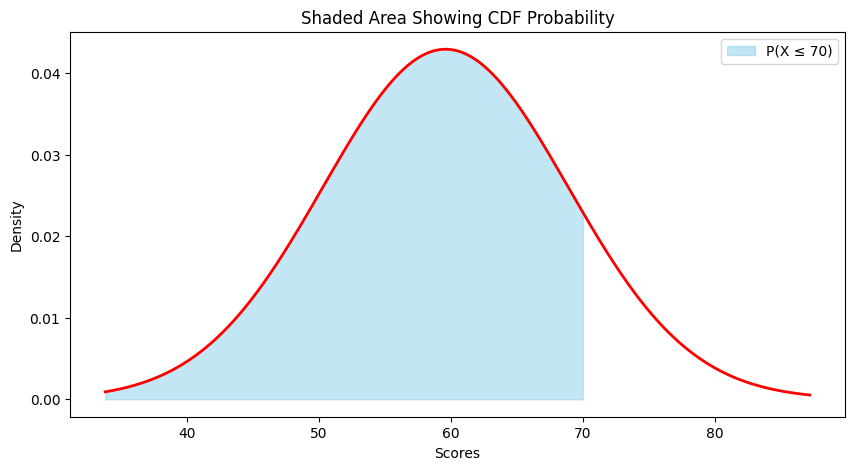

In [294]:
plt.figure(figsize=(10,5))
plt.plot(x, pdf, 'r-', linewidth=2)
plt.fill_between(x, pdf, where=(x<=70), color='skyblue', alpha=0.5, label="P(X ≤ 70)")
plt.title("Shaded Area Showing CDF Probability")
plt.xlabel("Scores")
plt.ylabel("Density")
plt.legend()
plt.show()

 Normality Test 

In [295]:

stat, p_value = shapiro(exam_scores)
print("\n🔍 Shapiro-Wilk Test for Normality")
print(f"Statistic = {stat:.3f}, p-value = {p_value:.3f}")
if p_value > 0.05:
    print("✅ Data looks normally distributed")
else:
    print("❌ Data does NOT follow a normal distribution")


🔍 Shapiro-Wilk Test for Normality
Statistic = 0.996, p-value = 0.830
✅ Data looks normally distributed
